## Train and save models

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../data/seattle_sample_500.csv")

In [3]:
data = gpd.GeoDataFrame(
    data, crs="EPSG:32610", geometry=gpd.points_from_xy(x=data.UTM_X, y=data.UTM_Y))

In [4]:
y = data.log_price

X_coords = data[['bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'condition',
                 'waterfront', 'view', 'age','UTM_X', 'UTM_Y']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_coords, y, random_state=1)

## Model training

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=10, random_state=0)
rf_model.fit(X_train.values, y_train)

X has feature names, but RandomForestRegressor was fitted without feature names


In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.6766668655394555

In [13]:
import sys
sys.path.append('/Users/ziqili/Desktop/geoshapley-main/geoshapley')
from geoshapley import GeoShapleyExplainer

In [14]:
import shap
background_X = shap.kmeans(X_coords, 10).data

In [15]:
explainer = GeoShapleyExplainer(rf_model.predict, background_X)
rslt = explainer.explain(X_coords)

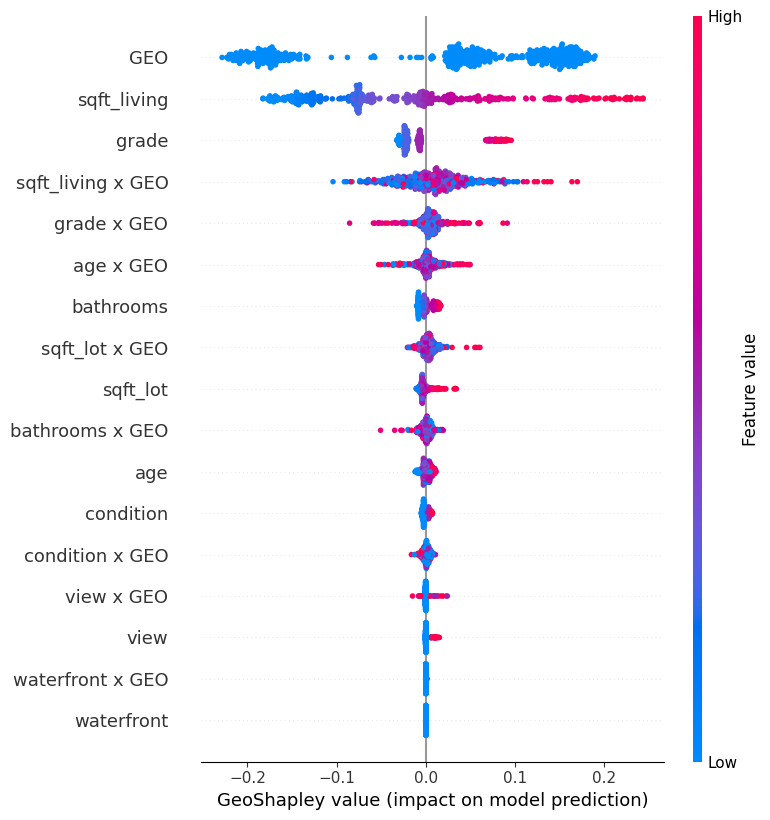

In [17]:
rslt.summary_plot(dpi=100,include_interaction=True)

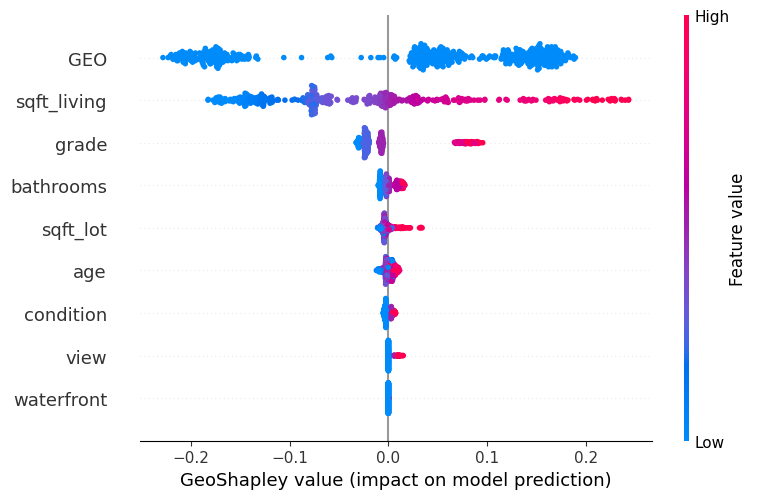

In [18]:
rslt.summary_plot(dpi=100,include_interaction=False)